## Communicate Data Findings


### Intodaction
#### This project is divided into two major parts :

#### In the first part, we will conduct an exploratory data analysis on a dataset of prosperLoanData. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

#### In the second part, We will take our main findings from our exploration and convey them to others through an explanatory analysis. To this end, We will create a slide deck that leverages polished, explanatory visualizations to communicate your results.



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [11]:
#load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

## Univariate Exploration

#### In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.



In [28]:
# setting color
default_color = sb.color_palette()[9]

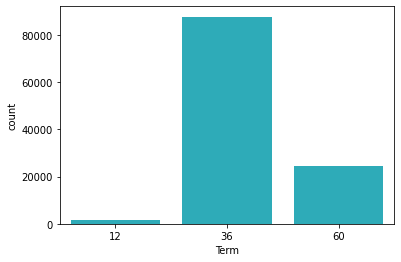

In [29]:
#First let's take a look at Term variable using a Count Plot:
#Visulizing the time periods for loan
sb.countplot(data = loan[features], x = 'Term', color = default_color);

#### For Term: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check LoanStatus:

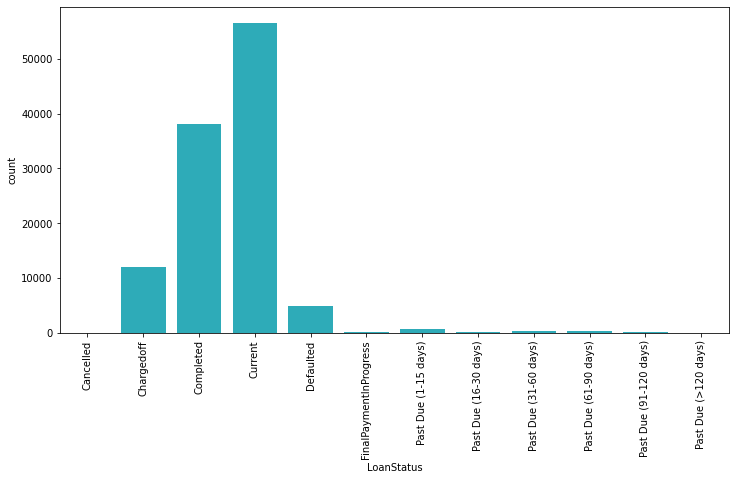

In [30]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = loan[features], x = 'LoanStatus', color = default_color);

#### Most of the loans in the dataset are actually Current loans. Following it with a big frequency the Completed loans, followed by Chargedoff, while Defaulted and Past due categories loans represent a minority. Up next - BorrowerRate:

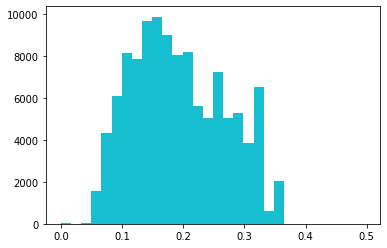

In [31]:
plt.hist(data=loan[features], x='BorrowerRate', bins=30, color = default_color);

#### The distribution of the BorrowerRate appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [32]:
# Check the frequency of the top 2 peaks
loan[features].BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3500    1905
Name: BorrowerRate, dtype: int64

#### Turns out two most common rates are 0.3177 and 0.3199. Let's check ProsperRating (Alpha) next:

#### Because ProsperRating (Alpha) is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [33]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
loan[features]['ProsperRating (Alpha)'] = loan[features]['ProsperRating (Alpha)'].astype(ordered_var)

<ipython-input-33-02745c8339fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan[features]['ProsperRating (Alpha)'] = loan[features]['ProsperRating (Alpha)'].astype(ordered_var)


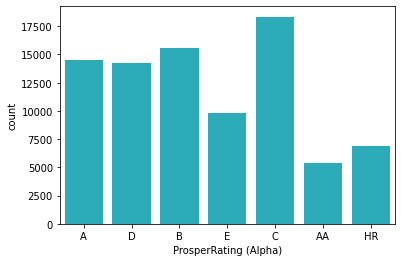

In [34]:
sb.countplot(data=loan[features], x='ProsperRating (Alpha)', color=default_color);

#### Interestingly enough ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through ListingCategory (numeric):

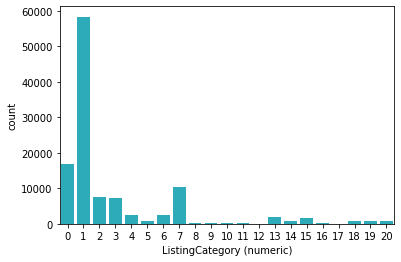

In [35]:
sb.countplot(data=loan[features], x='ListingCategory (numeric)', color=default_color);


#### The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

#### The vast majority of loans are used for debt consolidation. Other notable categories include Other, Auto, Home Improvement and Business. Next variable - EmploymentStatus:

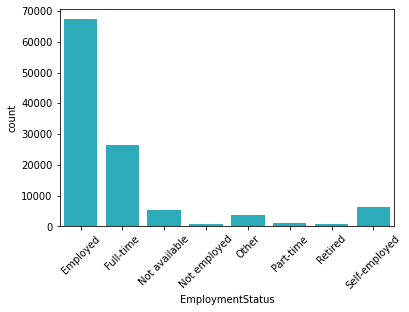

In [36]:
sb.countplot(data=loan[features], x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45);

#### The majority of borrowers are Employed all other categories constitute only small numbers of the borrowers. Let's move to the DelinquenciesLast7Years variable:

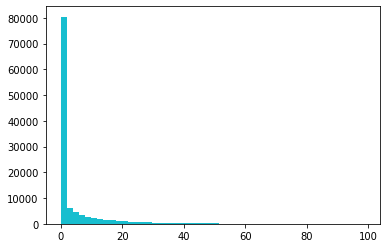

In [37]:
plt.hist(data=loan[features], x='DelinquenciesLast7Years', bins=50, color=default_color);


#### Most of the Prosper clients have 0 delinquencies for the last 7 years, a small minority has up to 20 delinquencies and very tiny group had more than 20 but less than 100 delinquencies. Next let's take a look at StatedMonthlyIncome:



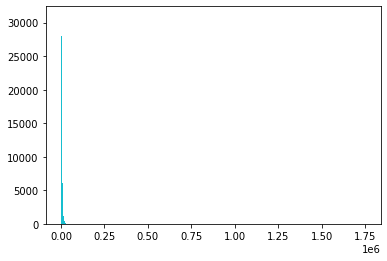

In [38]:
plt.hist(data=loan[features], x='StatedMonthlyIncome', bins=1000, color=default_color);


#### Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [39]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan[features]['StatedMonthlyIncome'].std()
income_mean = loan[features]['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan[features][loan[features]['StatedMonthlyIncome'] >= boundary])

428

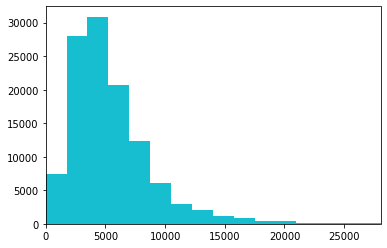

In [40]:
#Let's take a close look at the StatedMonthlyIncome;
# This time limit x scale by boundary
plt.hist(data=loan[features], x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary);

#### With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is about 5,000. Next step – TotalProsperLoans:

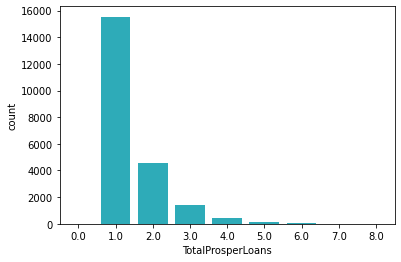

In [41]:
sb.countplot(data=loan[features], x='TotalProsperLoans', color=default_color);


#### For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - LoanOriginalAmount:

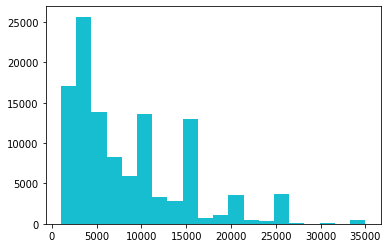

In [42]:
plt.hist(data=loan[features], x='LoanOriginalAmount', bins=20, color=default_color);


#### It looks like most of the loans are below 15,000 range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc.
#### Let's move on to LoanOriginationDate:

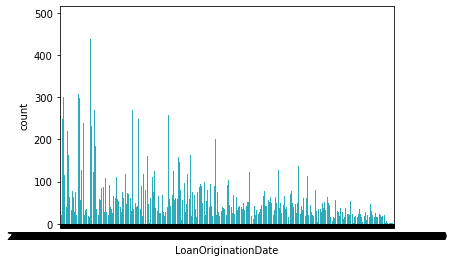

In [43]:
sb.countplot(data=loan[features], x='LoanOriginationDate', color=default_color);

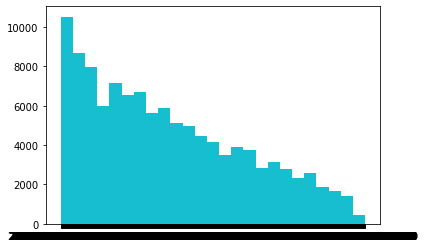

In [44]:
plt.hist(data=loan[features], x='LoanOriginationDate', bins=25, color=default_color);

In [45]:
loan[features]['LoanOriginationDate'].describe()


count                  113937
unique                   1873
top       2014-01-22 00:00:00
freq                      491
Name: LoanOriginationDate, dtype: object

#### Data points are form 2009-07-20 till 2014-02-21.
#### We can clearly see a substansial growth for the number of loans from the start of 2013. 
#### Next item - Recommendations:

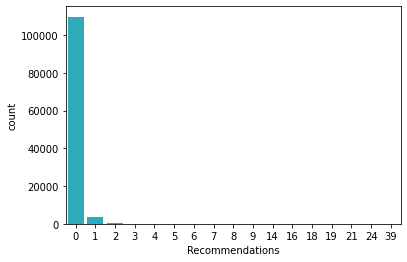

In [46]:
sb.countplot(data=loan[features], x='Recommendations', color=default_color);

#### The vast majority of loans obtained without recomendations. Next let's dig into Investors:

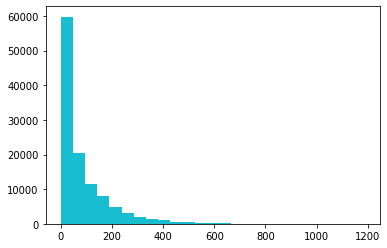

In [47]:
plt.hist(data=loan[features], x='Investors', bins=25, color=default_color);


#### Most loans have only one investor and majority less than 200 investors but some have about 1200 investors.

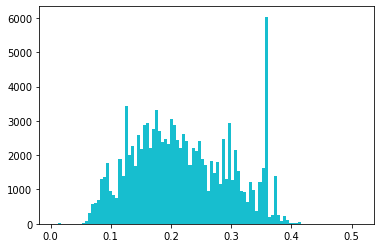

In [51]:
plt.hist(data=loan[features], x='BorrowerAPR', bins=100, color=default_color);

#### The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [52]:
# getting a first overview over the variable ProsperScore
print(loan[features].ProsperScore.describe())
print(loan[features].ProsperScore.value_counts())

count     84853.0
unique       11.0
top           4.0
freq      12595.0
Name: ProsperScore, dtype: float64
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64


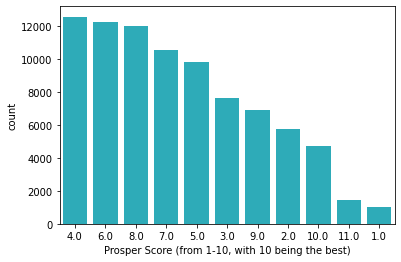

In [53]:
 #Bar Chart ProsperScore (custom risk score built using historical Prosper data)
# The score ranges from 1-10, with 10 being the best, or lowest risk score)

sb.countplot(data = loan[features], x = 'ProsperScore', color = default_color, order = loan[features]['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### The bar chart shows that there are customers in the data set that have a score of 11 which should not be possible since the score just ranges from 1-10 which needs to be cleaned in the next step

In [54]:
# I will exclude all customers with a Prosper Score of 11
loan[features] = loan[features][loan[features]['ProsperScore'] != 11]
#dubbel check if the operation was succesful
loan[features][loan[features]['ProsperScore'] == 11]

Empty DataFrame
Columns: [Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors, BorrowerAPR, ProsperScore, Occupation, EmploymentStatusDuration, IncomeRange]
Index: []

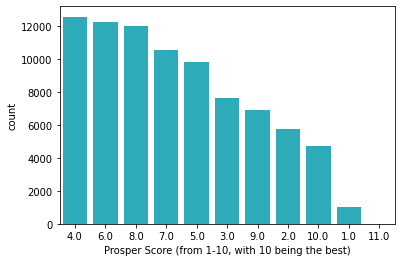

In [55]:
# now I will again plot the bar chart
sb.countplot(data = loan[features], x = 'ProsperScore', color = default_color, order = loan[features]['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper. Furthermore, not many borrowers received the highest score of 10

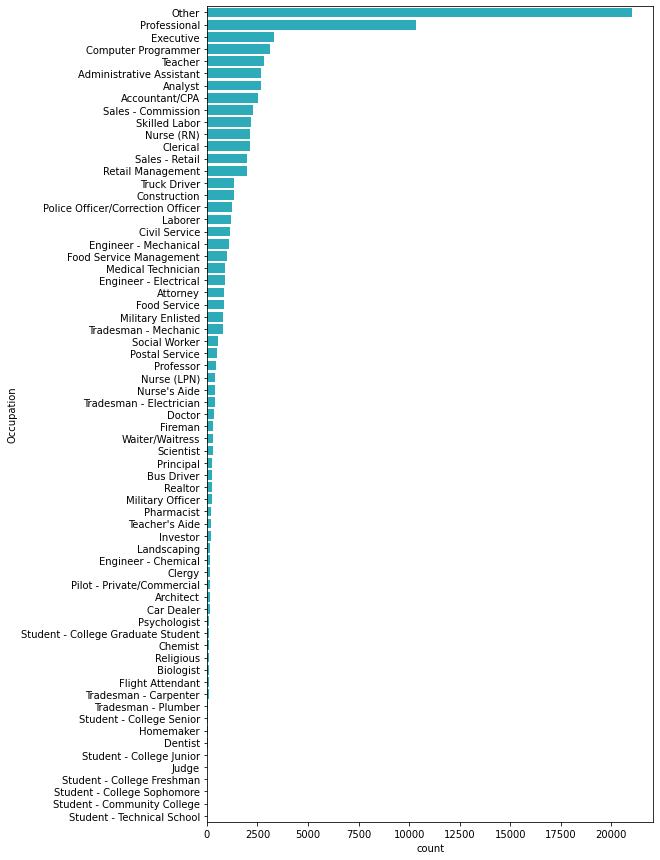

In [56]:
plt.figure(figsize=[8,15])
Occupation_order=loan[features]["Occupation"].value_counts().index
sb.countplot(data = loan[features], y = 'Occupation',color=default_color,order=Occupation_order)
plt.ylabel('Occupation')
plt.show()

#### In gerenral, studnets has the least number of loans.The mximum amount of loan belongs to "others" occupation, which I do not have any idea what it means! After "others, professionals with 15,000 are in the second place and all other jobs has <5000 number.

<AxesSubplot:xlabel='EmploymentStatusDuration', ylabel='count'>

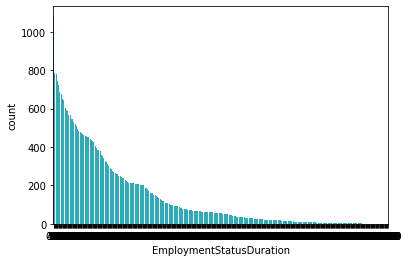

In [57]:
sb.countplot(data = loan[features], x = 'EmploymentStatusDuration', color = default_color, order = loan[features]['EmploymentStatusDuration'].value_counts().index)


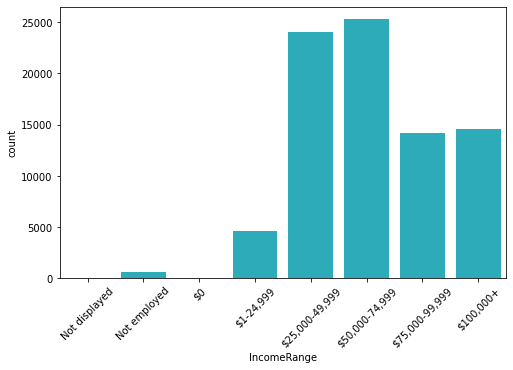

In [58]:
plt.figure(figsize=[8, 5])
IncomeRange_order=["Not displayed", "Not employed", "$0","$1-24,999","$25,000-49,999",
                   "$50,000-74,999","$75,000-99,999","$100,000+" ]
sb.countplot(data = loan[features], x = 'IncomeRange',color=default_color,order=IncomeRange_order)
plt.xlabel('IncomeRange')
plt.xticks(rotation=45)
#plt.xlim(0,1000)
plt.show()


#### Clearly, most of ("$32,000") loaners are have a salary of "$25,000-49,999" and "$50,000-74,999." After that, on the second level ("~$15,000"), laoners are making "$75,000-99,999" and "$100,000+." Rest of loaner, either are not employed, or making "<$25,000"

## Bivariate Exploration


##### To start off with, we will look at the pairwise correlations present between features in the data.

In [59]:
#Numberical vs Categorical features
numeric_vars = ['BorrowerRate', 
                'StatedMonthlyIncome','Recommendations','LoanOriginalAmount','EmploymentStatusDuration',
                'ListingCategory (numeric)', 'TotalProsperLoans',
                'LoanOriginationDate','Investors','BorrowerAPR']

categoric_vars = ['Term','LoanStatus', 'ProsperScore', 'EmploymentStatus','IncomeRange','Occupation']


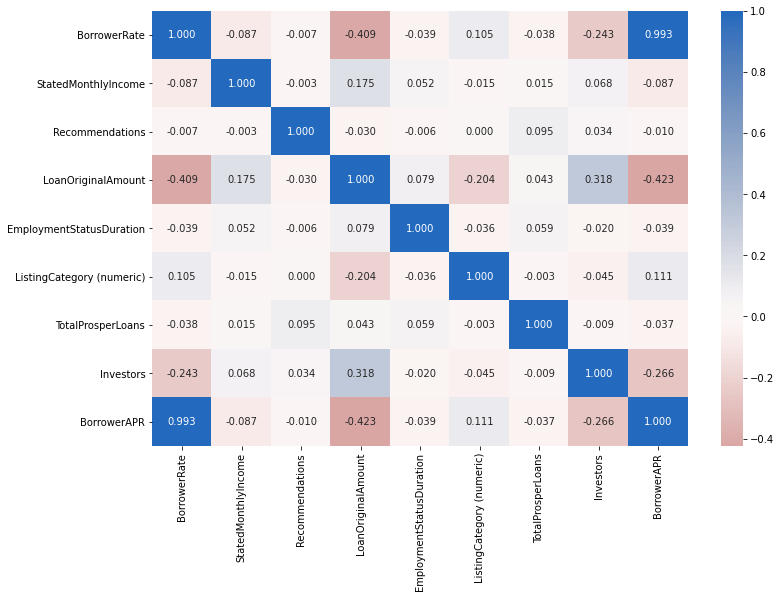

In [60]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan[features][numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

#### Correlation Plot: There are no strong positive relationships between any pairs. It makes sense because higher BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. 

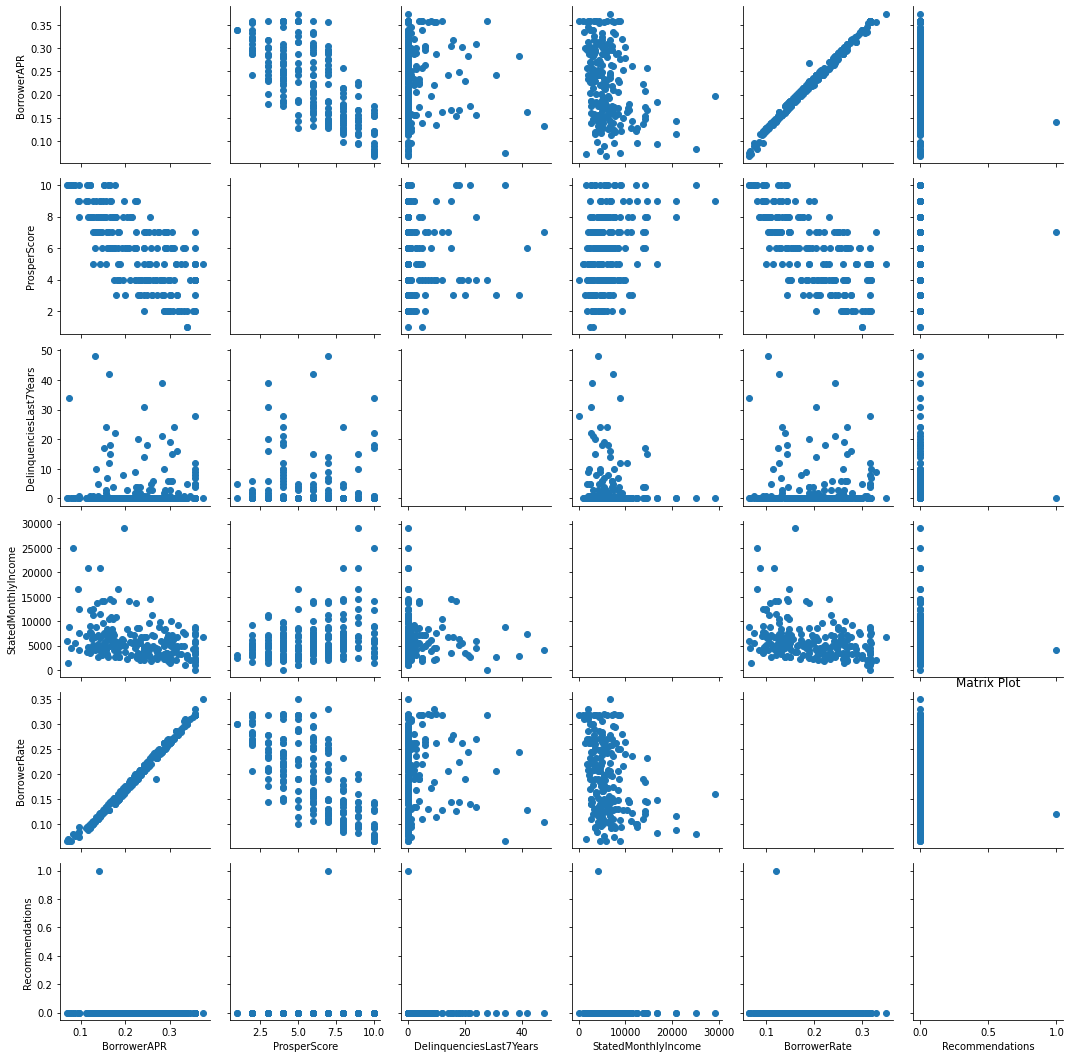

In [61]:
# plot matrix: only 300 random loans are used to see the pattern more clearer


numeric_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome','BorrowerRate','Recommendations' ]

samples = np.random.choice(loan[features].shape[0], 300, replace = False)
loan_samp = loan[features].loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');

#### Matrix Plot: Similar to the correlation plot, we can determine which pair has negative or  positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. StatedMonthlyIncome does not give useful information on BorrowerAPR and will not be further analyzed.


In [62]:
try:
    # LoanStatus Vs BorrowerAPR VS EmploymentStatus
    plt.figure(figsize=[20,15])
    base_color = sns.color_palette()[0:]
    sns.boxplot(x="LoanStatus", y="BorrowerAPR", hue='EmploymentStatus', data=loan[features], palette=base_color);
    plt.xticks(rotation = 90);
    plt.xlabel('Loan Status');
    plt.ylabel('BorrowerAPR');
    plt.title('LoanStatus Vs BorrowerAPR Vs EmploymentStatus');
except:
    print("error")

error


<Figure size 1440x1080 with 0 Axes>

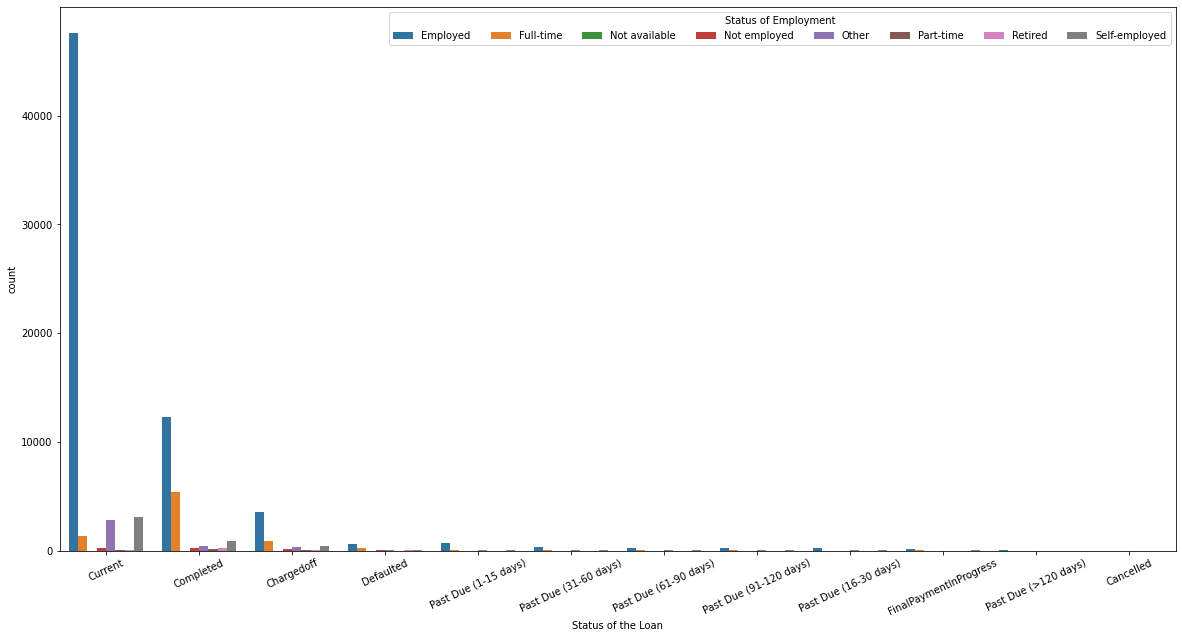

In [63]:
#plotting EmploymentStatus (Status of Employment) against LoanStatus with help of a heat map
plt.figure(figsize = [20,10])
sb.countplot(data = loan[features], x = 'LoanStatus', hue = 'EmploymentStatus', order = loan[features]['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');


#### The status of the employment of the borrower seem not to have an impact on the outcome of the loan.


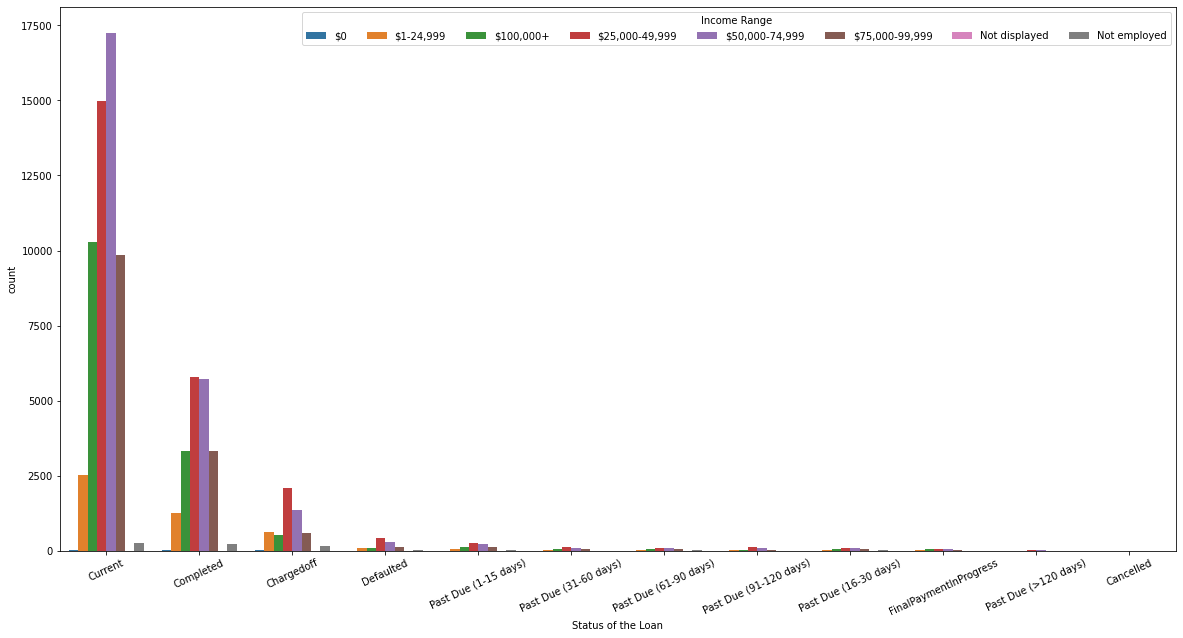

In [64]:
#plotting Income Range against LoanStatus with help of a heat map

plt.figure(figsize = [20,10])
sb.countplot(data = loan[features], x = 'LoanStatus', hue = 'IncomeRange', order = loan[features]['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The Income Range of the borrower seem not to have an impact on the outcome of the loan.


#### let's look at relationships between the four categorical features.

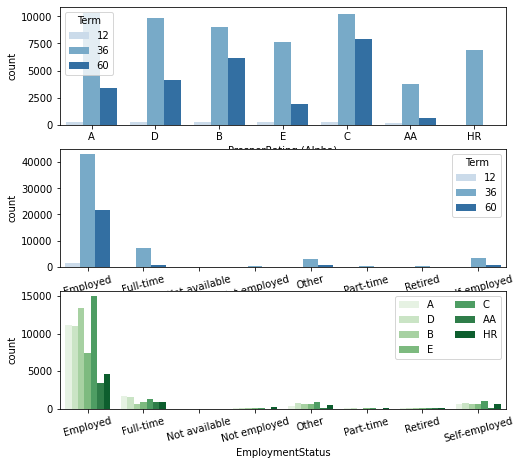

In [65]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = loan[features], x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loan[features], x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)
# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loan[features], x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

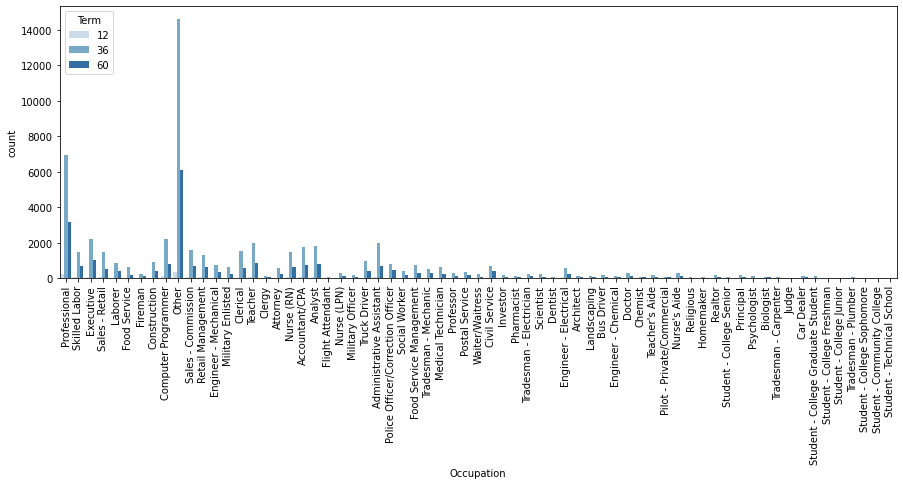

In [66]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sb.countplot(data = loan[features], x = 'Occupation', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=90);

#### The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

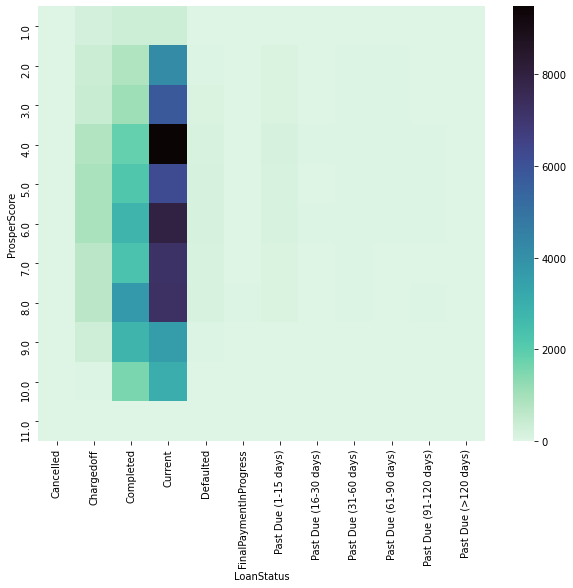

In [67]:
ct_counts=loan[features].groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)

plt.figure(figsize = [10,8])
sb.heatmap(ct_counts,cmap="mako_r");
#sb.heatmap(ct_counts,annot=True,fmt='0.1f',cmap="mako_r");

#### Above graph shows that 1. in this data most people currenly have a loan or completed their loans and their interest rate is ~4-8.



## Multivariate Exploration

#### The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount

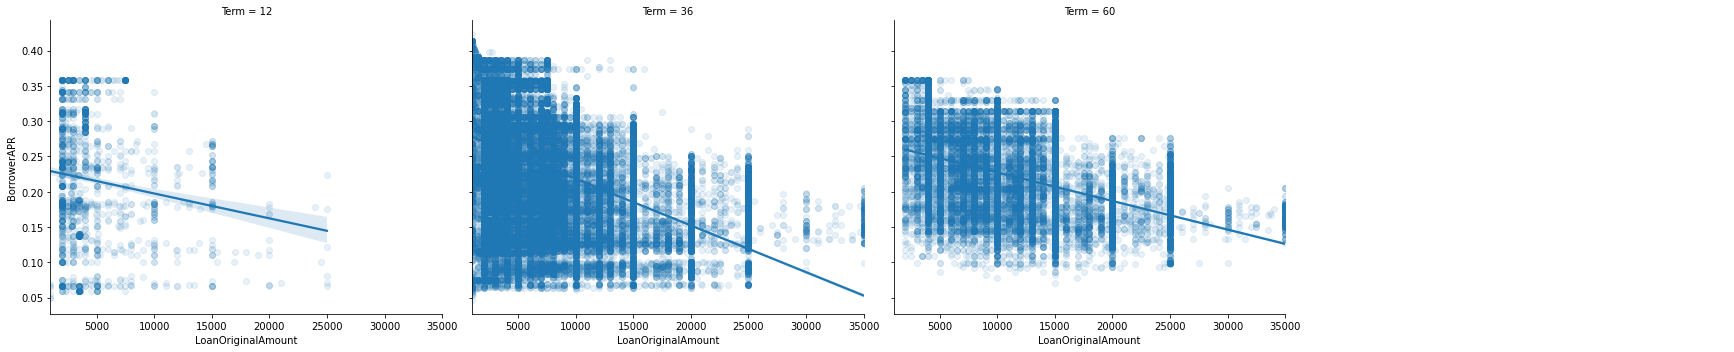

In [68]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= loan[features], aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


#### Term doesn't seem to have effect on relationship of APR and loan amount



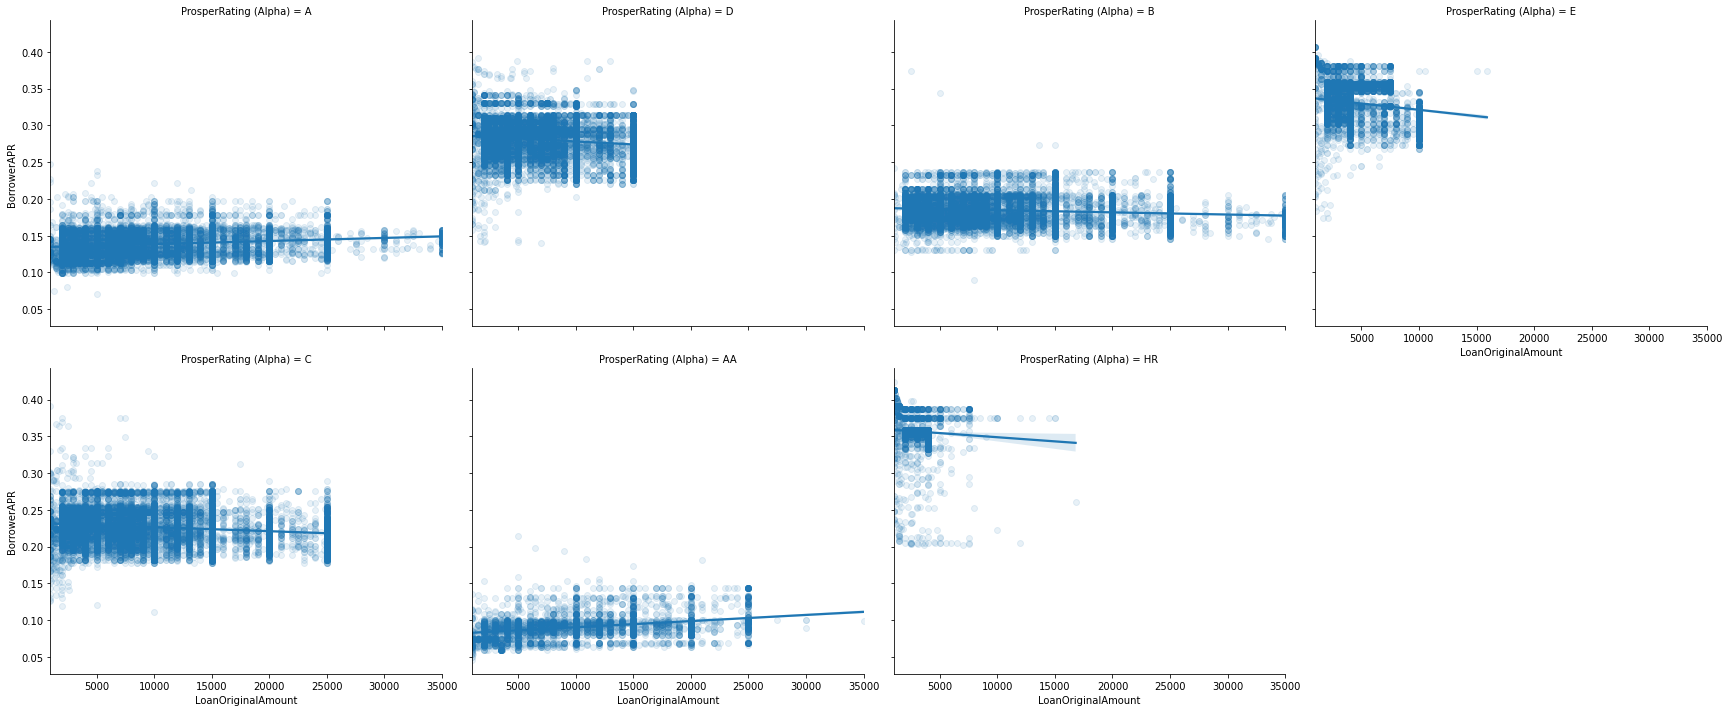

In [69]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan[features], aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

#### The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

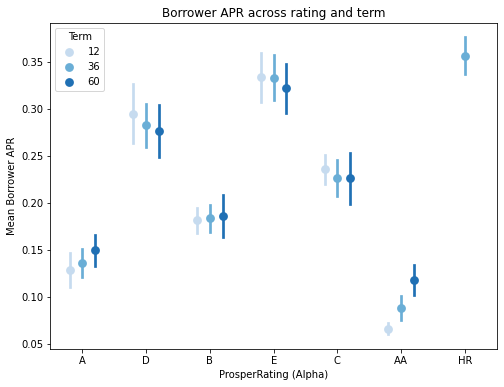

In [70]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan[features], x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

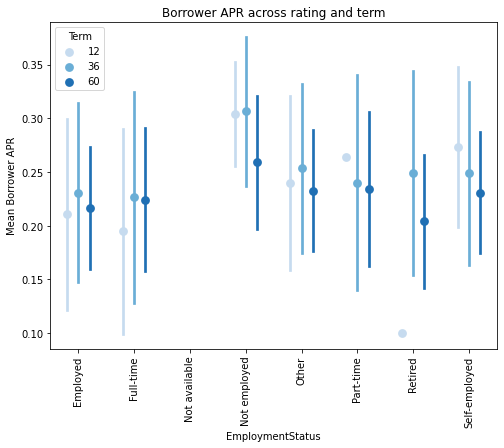

In [71]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan[features], x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

#### Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

#### Then, look at the rating and term effects on stated monthly income and loan original amount variables



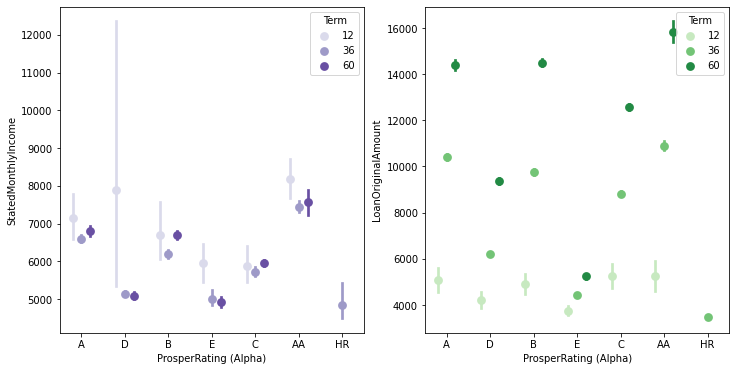

In [73]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan[features], x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan[features], x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);


#### For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

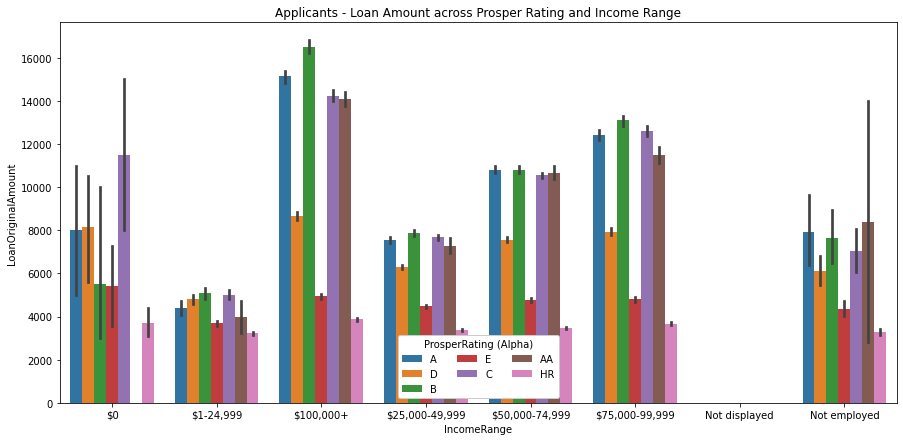

In [74]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan[features], x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating (Alpha)')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

### Does rating depend on the monhtly income and Employment status?

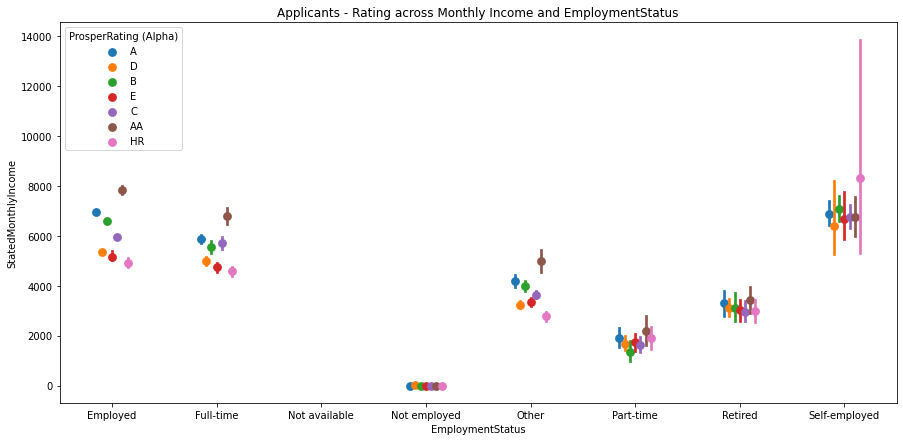

In [75]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan[features], x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');